In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import IsolationForest

In [ ]:
# I have not studied Data anyaltics course, So, this dataset is completely new for me
df = pd.read_csv("Housing_Prices 1.csv")

In [ ]:
# we are going to see dataset in detail.
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<p>We can see in the data that we have many yes/no fields and one field with multiple text categories. We have to convert all of these correctly into numeric format.</p>

In [ ]:
# We are going to check if there is any missing value we have.
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# There is some irrelevent colums that we do not need int his case, I am going to drop here.
df = df.drop(["id", "date","zipcode","lat", "long"], axis=1)

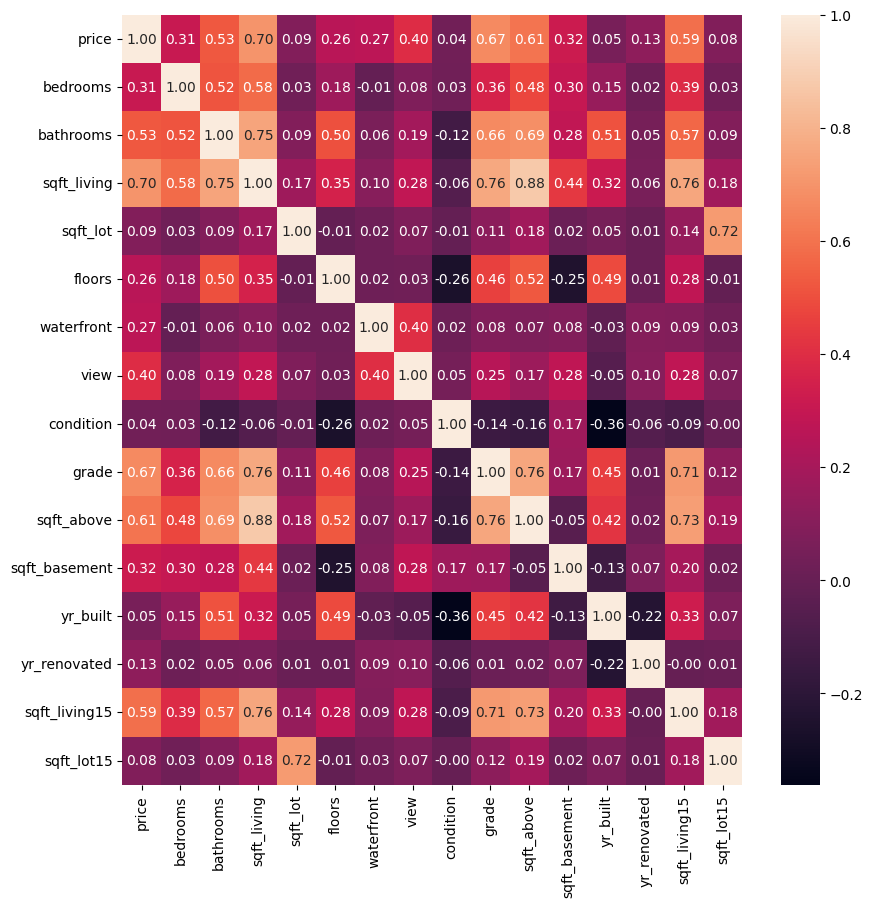

In [31]:
# understand correlations
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, annot=True, fmt='.2f')

# low correlataions
# sqft_lot
# condition
# yr_built
# sqft_lot15
# yr_renovated

# price and grade have high correlations
# bathrooms have high correlations with sqft_living*, grade, sqft_above*
# sqft_living high correlations with grade, sqft_living15
# waterfront and view have correlation to each other only

# store to drop list
drop_list =["sqft_lot", "sqft_living", "condition", "sqft_above", "yr_built", "yr_renovated", "sqft_lot15", "sqft_living15", "waterfront"]

<Axes: >

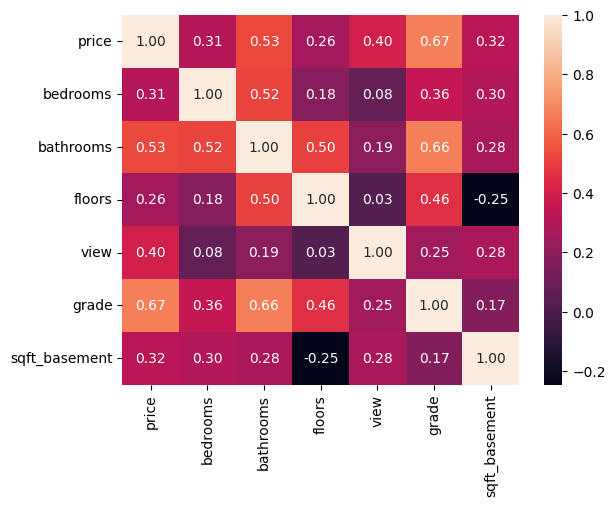

In [32]:
df = df.drop(drop_list, axis=1)
# understand correlations
corr = df.corr()
sns.heatmap(data=corr, annot=True, fmt='.2f')

75000.0
7700000.0


<Axes: xlabel='price', ylabel='Count'>

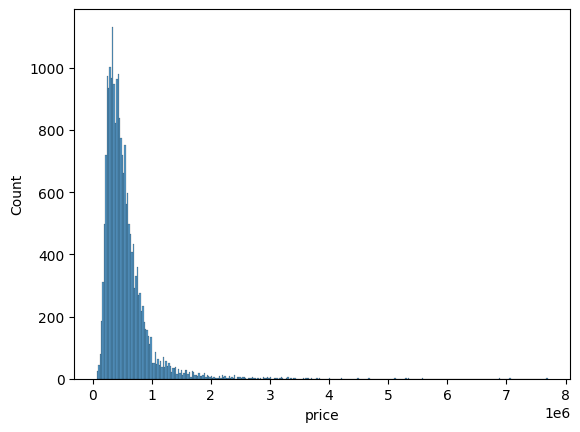

In [ ]:
print(df['price'].min())
print(df['price'].max())

sns.histplot(df['price'])
# There is price which is too much outliers and not in the normal distribution

grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: count, dtype: int64


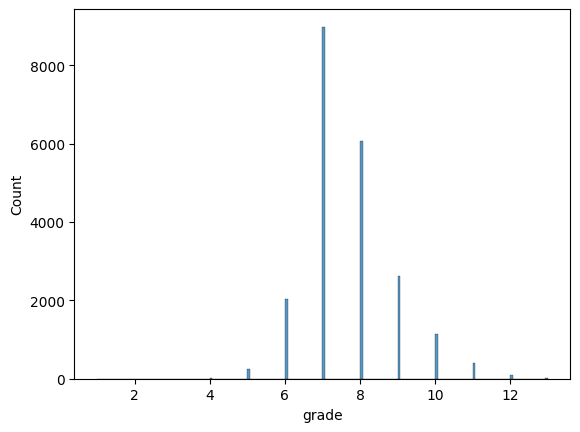

In [ ]:
sns.histplot(df['grade'])
# Grade is not in disturibution that we need, but later on I will change it according to our requirments for this model

print(df['grade'].value_counts().sort_index())

In [ ]:
# Define a function to categorize the 'grade' into column
def categorize_grade(grade):
    if grade <= 6:
        return 1
    elif grade <= 7:
        return 2
    elif grade <= 9:
        return 3
    else:
        return 4
    

# Apply the function to create a new target column
df['grade_category'] = df['grade'].apply(categorize_grade)

# Verify the new target column
df[['grade', 'grade_category']].head()


,grade,grade_category
0,7,2
1,7,2
2,6,1
3,7,2
4,8,3


<Axes: xlabel='grade_category', ylabel='Count'>

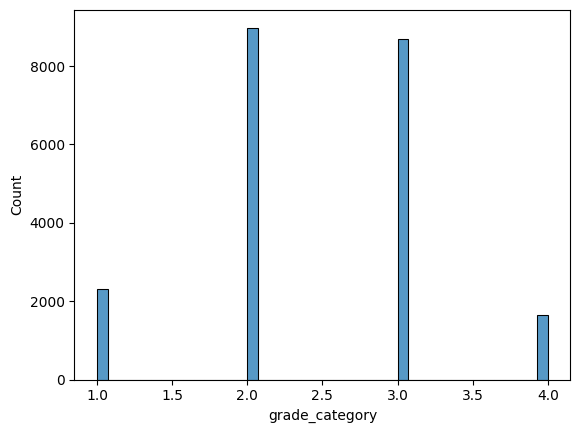

In [36]:
df = df.drop('grade', axis=1)
sns.histplot(df['grade_category'])

In [37]:
# code from AI

# Manually specify bin edges for 4 categories
#bin_edges = [1, 5, 8, 11, 13]
#bin_labels = [1, 2, 3, 4]

# Apply pd.cut
#df['grade_bins'] = pd.cut(df['grade'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# show distribution
#sns.histplot(df['grade_bins'])

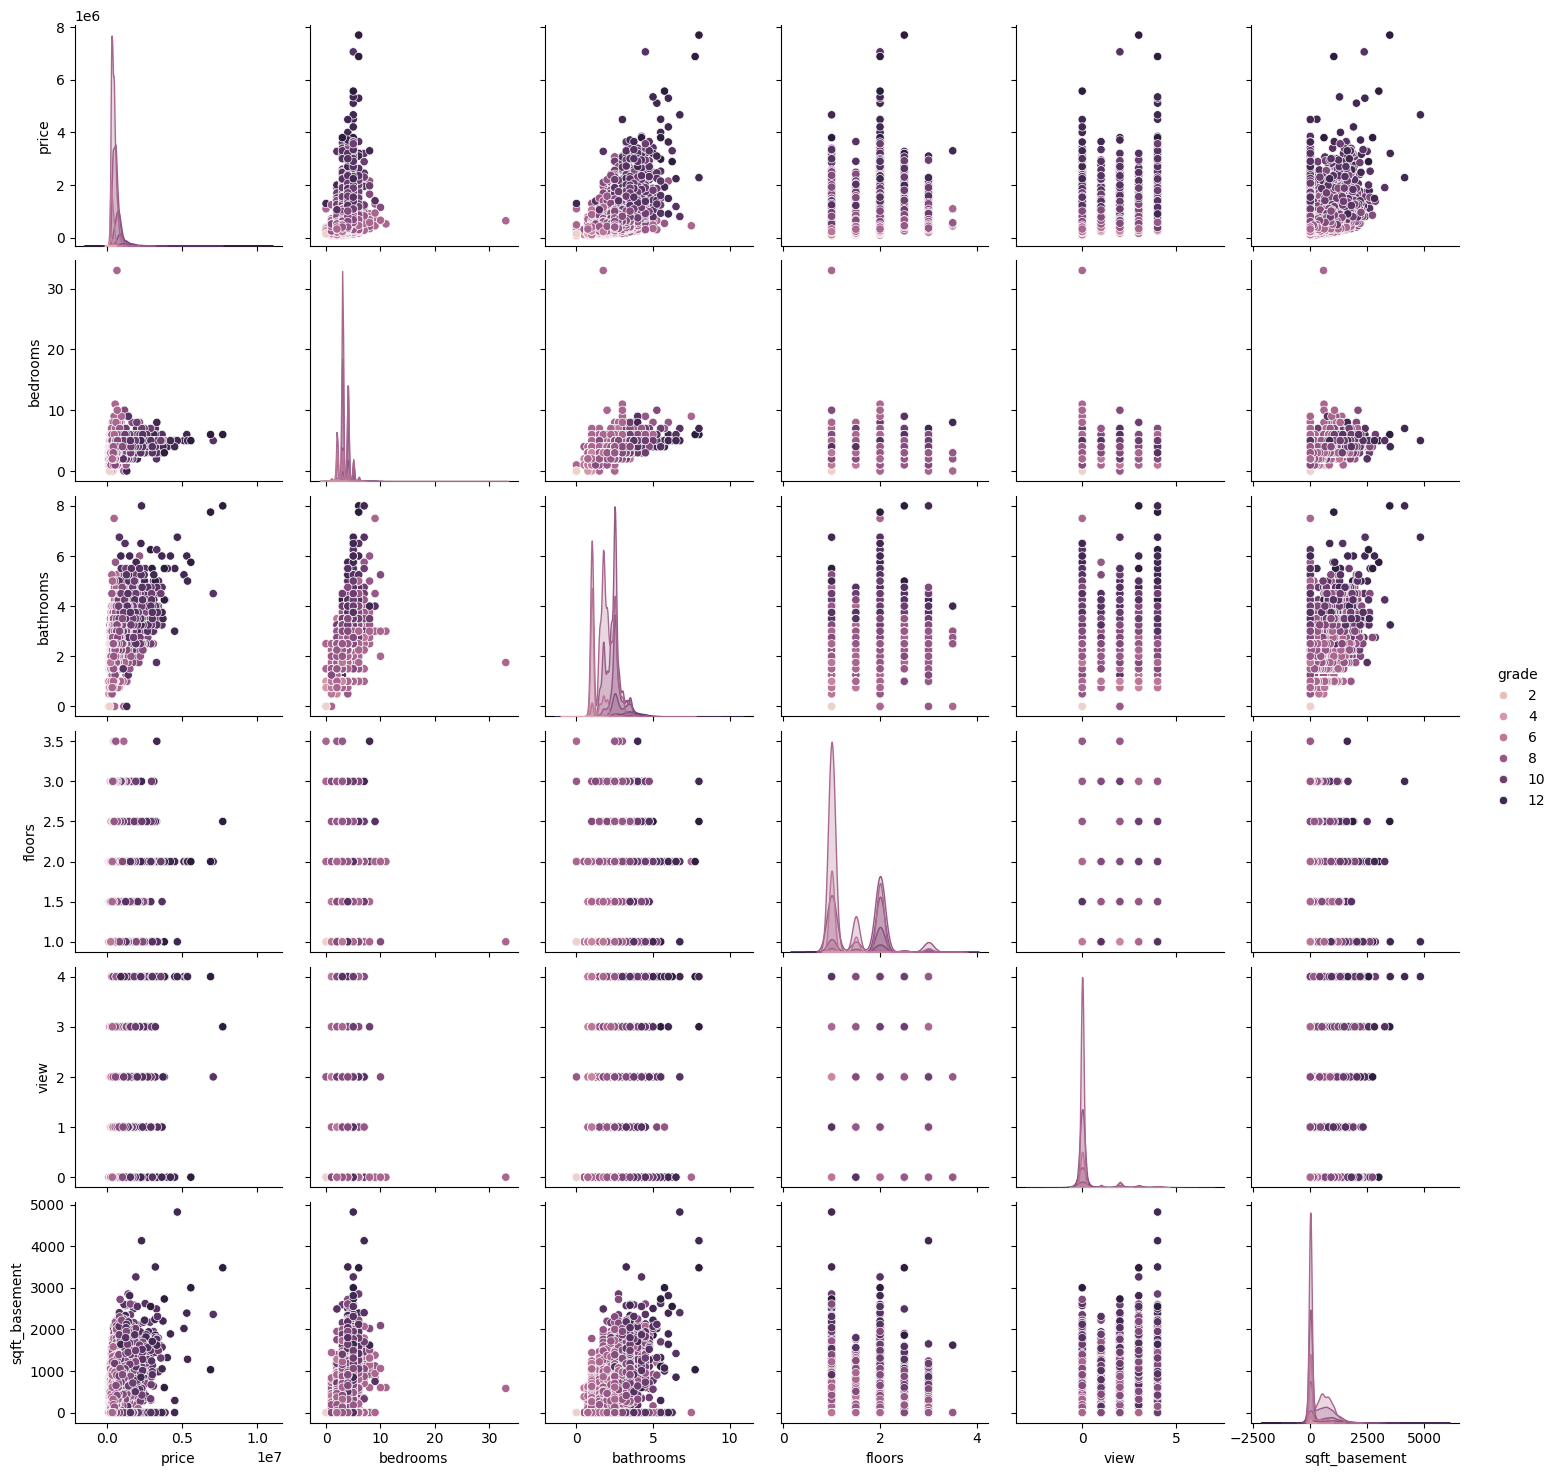

In [ ]:
# look for distributions
#sns.pairplot(data=df, hue="grade")

###  Use TomekLinks to remove overlapping data (optimization)

Class distribution before overlap removal:
grade_category
2    8981
3    8683
1    2313
4    1636
Name: count, dtype: int64
Class distribution AFTER overlap removal:
grade_category
2    7521
3    7101
1    1867
4    1636
Name: count, dtype: int64


<Axes: >

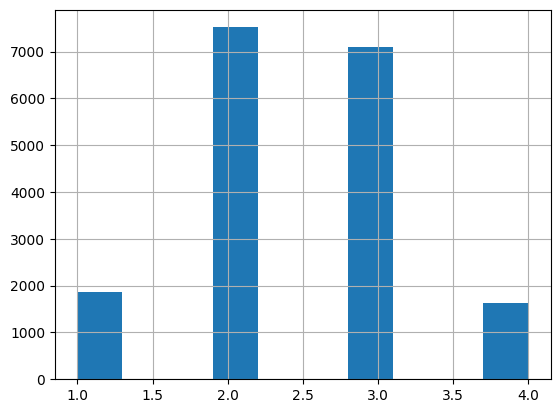

In [38]:
target = "grade_category"
tomek = TomekLinks()

# Display new class distribution
print("Class distribution before overlap removal:")
print(df[target].value_counts())

# X/y -split
X = df.drop(target, axis=1)
y = df[target]

# create new resampled versions of X and y
X, y = tomek.fit_resample(X, y)

# re-create a new DataFrame
df = pd.DataFrame(X, columns=X.columns)
df[target] = y

# Display new class distribution
print("Class distribution AFTER overlap removal:")
print(df[target].value_counts())

# visualize final distribution
df[target].hist()

###  Use Isolation Forest to remove outliers (optimization)

1269
Class distribution AFTER Isolation Forest:
grade_category
2    7392
3    6590
1    1835
4    1039
Name: count, dtype: int64


<Axes: >

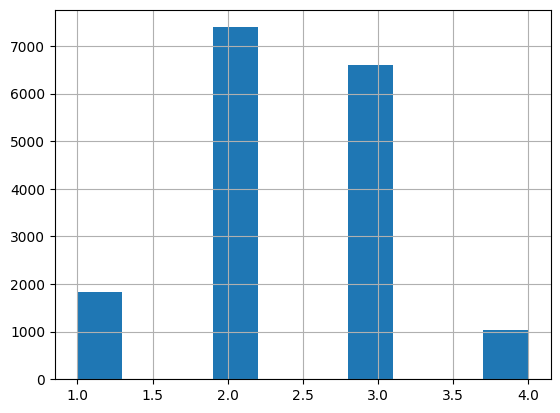

In [ ]:
# Here is process the whole dataset and compares variables to each other instead
# of focusing on outliers on a single variable
features = df.drop(target, axis=1)

# Now we can adjust the contamination rate as you see fit
# for example, if you expect 5% of the data to be outliers then you can use 0.05 etc. 
iso = IsolationForest(contamination=0.07) 

df['outlier_score'] = iso.fit_predict(features)
df_no_outliers = df[df['outlier_score'] == 1]

# filter outliers only
df_no_outliers = df_no_outliers.drop(columns=['outlier_score'])
print(len(df) - len(df_no_outliers))

df = df_no_outliers

# Now display new class distribution
print("Class distribution AFTER Isolation Forest:")
print(df[target].value_counts())

# visualize final distribution
df[target].hist()

# almost lost all category 4

### Now we are going to save the processed and optimized data into a different file.

In [40]:
df.to_csv("housing_classification_processed.csv", index=False)